In [47]:
import numpy as np 
import pandas as pd
import os

In [50]:
import pyarrow.parquet as pq
import s3fs

fs = s3fs.S3FileSystem(anon=True, key='minio', secret='minio123', client_kwargs=dict(endpoint_url="http://minio-ml-workshop:9000"))
# fs.ls("flights-data/flights-clean")
# 
df = pq.ParquetDataset('s3://flights-data/flights-clean', filesystem = fs).read_pandas().to_pandas()

In [51]:
pd.set_option('display.max_columns', None)
df.head(5)

,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay,AL_AIRLINE,ORIG_AIRPORT,ORIG_CITY,ORIG_STATE,ORIG_LATITUDE,ORIG_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_LATITUDE,DEST_LONGITUDE,DELAYED
0,11,30,1,WN,552,N7721E,LGA,DAL,0615,0609,-6.0,20.0,0629,250.0,244.0,221.0,1381,0910,3.0,0925,0913,-12.0,0,0,None,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,LaGuardia Airport (Marine Air Terminal),New York,NY,40.77724,-73.87261,Dallas Love Field,Dallas,TX,32.84711,-96.85177,0
1,11,30,1,WN,271,N565WN,MCI,ATL,0615,0611,-4.0,11.0,0622,125.0,125.0,88.0,692,0850,26.0,0920,0916,-4.0,0,0,None,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,Kansas City International Airport,Kansas City,MO,39.29761,-94.71391,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,33.64044,-84.42694,0
2,11,30,1,WN,673,N799SW,MCO,BNA,0615,0611,-4.0,15.0,0626,120.0,112.0,93.0,616,0659,4.0,0715,0703,-12.0,0,0,None,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,Orlando International Airport,Orlando,FL,28.42889,-81.31603,Nashville International Airport,Nashville,TN,36.12448,-86.67818,0
3,11,30,1,WN,2720,N952WN,OAK,SAN,0615,0616,1.0,13.0,0629,90.0,85.0,67.0,446,0736,5.0,0745,0741,-4.0,0,0,None,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,Oakland International Airport,Oakland,CA,37.72129,-122.22072,San Diego International Airport (Lindbergh Field),San Diego,CA,32.73356,-117.18966,0
4,11,30,1,WN,805,N725SW,OKC,DEN,0615,0610,-5.0,13.0,0623,105.0,95.0,73.0,495,0636,9.0,0700,0645,-15.0,0,0,None,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,Will Rogers World Airport,Oklahoma City,OK,35.39309,-97.60073,Denver International Airport,Denver,CO,39.85841,-104.66700,0


In [52]:
df.count()

month                  5332914
day                    5332914
day_of_week            5332914
airline                5332914
flight_number          5332914
tail_number            5318547
origin_airport         5332914
destination_airport    5332914
scheduled_departure    5332914
departure_time         5249100
departure_delay        5249100
taxi_out               5246302
wheels_off             5246302
scheduled_time         5332908
elapsed_time           5231130
air_time               5231130
distance               5332914
wheels_on              5242972
taxi_in                5242972
scheduled_arrival      5332914
arrival_time           5242972
arrival_delay          5231130
diverted               5332914
cancelled              5332914
cancellation_reason      87430
air_system_delay       1003360
security_delay         1003360
airline_delay          1003360
late_aircraft_delay    1003360
weather_delay          1003360
AL_AIRLINE             5332914
ORIG_AIRPORT           5332914
ORIG_CIT

In [53]:
df.shape

(5332914, 42)

In [54]:
df.columns

Index(['month', 'day', 'day_of_week', 'airline', 'flight_number',
       'tail_number', 'origin_airport', 'destination_airport',
       'scheduled_departure', 'departure_time', 'departure_delay', 'taxi_out',
       'wheels_off', 'scheduled_time', 'elapsed_time', 'air_time', 'distance',
       'wheels_on', 'taxi_in', 'scheduled_arrival', 'arrival_time',
       'arrival_delay', 'diverted', 'cancelled', 'cancellation_reason',
       'air_system_delay', 'security_delay', 'airline_delay',
       'late_aircraft_delay', 'weather_delay', 'AL_AIRLINE', 'ORIG_AIRPORT',
       'ORIG_CITY', 'ORIG_STATE', 'ORIG_LATITUDE', 'ORIG_LONGITUDE',
       'DEST_AIRPORT', 'DEST_CITY', 'DEST_STATE', 'DEST_LATITUDE',
       'DEST_LONGITUDE', 'DELAYED'],
      dtype='object')

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,5332914.0,6.207210,3.383807,1.00000,3.00000,6.00000,9.00000,12.00000
day,5332914.0,15.688744,8.774687,1.00000,8.00000,16.00000,23.00000,31.00000
day_of_week,5332914.0,3.919179,1.993635,1.00000,2.00000,4.00000,6.00000,7.00000
flight_number,5332914.0,2178.418536,1760.521385,1.00000,731.00000,1690.00000,3252.00000,9855.00000
departure_delay,5249100.0,9.774568,37.592331,-82.00000,-5.00000,-1.00000,8.00000,1988.00000
taxi_out,5246302.0,16.102897,8.991109,1.00000,11.00000,14.00000,19.00000,225.00000
scheduled_time,5332908.0,141.783158,75.251707,18.00000,85.00000,123.00000,174.00000,718.00000
elapsed_time,5231130.0,137.193964,74.300757,14.00000,82.00000,119.00000,169.00000,766.00000
air_time,5231130.0,113.665388,72.297641,7.00000,60.00000,94.00000,144.00000,690.00000
distance,5332914.0,822.895531,607.799189,21.00000,373.00000,649.00000,1065.00000,4983.00000


In [57]:
df.isnull().any()

month                  False
day                    False
day_of_week            False
airline                False
flight_number          False
tail_number             True
origin_airport         False
destination_airport    False
scheduled_departure    False
departure_time          True
departure_delay         True
taxi_out                True
wheels_off              True
scheduled_time          True
elapsed_time            True
air_time                True
distance               False
wheels_on               True
taxi_in                 True
scheduled_arrival      False
arrival_time            True
arrival_delay           True
diverted               False
cancelled              False
cancellation_reason     True
air_system_delay        True
security_delay          True
airline_delay           True
late_aircraft_delay     True
weather_delay           True
AL_AIRLINE             False
ORIG_AIRPORT           False
ORIG_CITY              False
ORIG_STATE             False
ORIG_LATITUDE 

In [60]:
df.isnull().sum().sort_values(ascending = False)

cancellation_reason    5245484
late_aircraft_delay    4329554
weather_delay          4329554
airline_delay          4329554
security_delay         4329554
air_system_delay       4329554
air_time                101784
arrival_delay           101784
elapsed_time            101784
wheels_on                89942
arrival_time             89942
taxi_in                  89942
wheels_off               86612
taxi_out                 86612
departure_time           83814
departure_delay          83814
tail_number              14367
DEST_LATITUDE             4610
DEST_LONGITUDE            4610
ORIG_LATITUDE             4605
ORIG_LONGITUDE            4605
scheduled_time               6
DEST_CITY                    0
DEST_AIRPORT                 0
ORIG_STATE                   0
ORIG_CITY                    0
ORIG_AIRPORT                 0
AL_AIRLINE                   0
DEST_STATE                   0
month                        0
cancelled                    0
diverted                     0
day     

In [58]:
df[df["tail_number"].isna()].head(5)


,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay,AL_AIRLINE,ORIG_AIRPORT,ORIG_CITY,ORIG_STATE,ORIG_LATITUDE,ORIG_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_LATITUDE,DEST_LONGITUDE,DELAYED
349,11,30,1,AA,791,None,BOS,PHL,0530,None,NaN,NaN,None,86.0,NaN,NaN,280,None,NaN,0656,None,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,Gen. Edward Lawrence Logan International Airport,Boston,MA,42.36435,-71.00518,Philadelphia International Airport,Philadelphia,PA,39.87195,-75.24114,0
949,11,30,1,UA,600,None,ORD,DCA,0600,None,NaN,NaN,None,112.0,NaN,NaN,612,None,NaN,0852,None,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,Chicago O'Hare International Airport,Chicago,IL,41.97960,-87.90446,Ronald Reagan Washington National Airport,Arlington,VA,38.85208,-77.03772,0
1552,11,30,1,UA,263,None,DEN,ORD,1300,None,NaN,NaN,None,146.0,NaN,NaN,888,None,NaN,1626,None,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,Denver International Airport,Denver,CO,39.85841,-104.66700,Chicago O'Hare International Airport,Chicago,IL,41.97960,-87.90446,0
1718,11,30,1,AA,2056,None,RSW,CLT,1310,None,NaN,NaN,None,115.0,NaN,NaN,600,None,NaN,1505,None,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,Southwest Florida International Airport,Ft. Myers,FL,26.53617,-81.75517,Charlotte Douglas International Airport,Charlotte,NC,35.21401,-80.94313,0
4762,11,30,1,UA,459,None,ORD,DEN,1610,None,NaN,NaN,None,164.0,NaN,NaN,888,None,NaN,1754,None,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,Chicago O'Hare International Airport,Chicago,IL,41.97960,-87.90446,Denver International Airport,Denver,CO,39.85841,-104.66700,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332914 entries, 0 to 5332913
Data columns (total 42 columns):
 #   Column               Dtype  
---  ------               -----  
 0   month                int32  
 1   day                  int32  
 2   day_of_week          int32  
 3   airline              object 
 4   flight_number        int32  
 5   tail_number          object 
 6   origin_airport       object 
 7   destination_airport  object 
 8   scheduled_departure  object 
 9   departure_time       object 
 10  departure_delay      float64
 11  taxi_out             float64
 12  wheels_off           object 
 13  scheduled_time       float64
 14  elapsed_time         float64
 15  air_time             float64
 16  distance             int32  
 17  wheels_on            object 
 18  taxi_in              float64
 19  scheduled_arrival    object 
 20  arrival_time         object 
 21  arrival_delay        float64
 22  diverted             int32  
 23  cancelled            int32  
 24

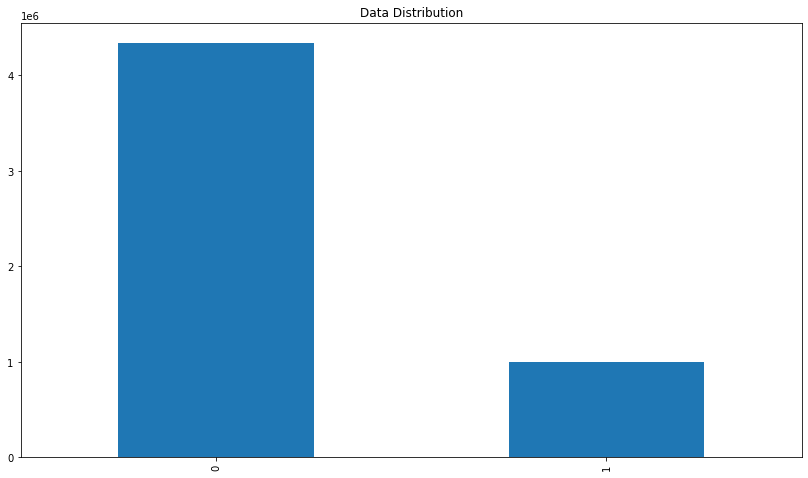

In [63]:
ax = df["DELAYED"].value_counts().plot(kind='bar',figsize=(14,8),title="Data Distribution")
